In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [59]:
df = pickle.load(open('./processed_data/houses_cleaned.p',"rb"))
columnas = ['house_type', 'bath_num', 'floor', 'm2_real', 'room_num', 
            'built_in_wardrobe', 'lift',
            'storage_room', 'terrace',
            'pop_total', 'pop_foreign', 'rent',
            "location"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20813 entries, 0 to 24772
Data columns (total 32 columns):
house_id             20813 non-null int64
ad_description       20109 non-null object
price                20813 non-null int64
bath_num             20813 non-null int64
condition            20813 non-null category
floor                20813 non-null int64
house_type           20813 non-null object
m2_real              20813 non-null int64
room_num             20813 non-null int64
air_conditioner      20813 non-null bool
balcony              20813 non-null bool
built_in_wardrobe    20813 non-null bool
chimney              20813 non-null bool
garage               20813 non-null category
garden               20813 non-null bool
lift                 20813 non-null bool
reduced_mobility     20813 non-null bool
storage_room         20813 non-null bool
swimming_pool        20813 non-null bool
terrace              20813 non-null bool
loc_zone             20813 non-null category
loc_city

In [60]:
valor_hipoteca = 230000
df["max_hipoteca"] = np.where(df["price"] < valor_hipoteca, 1, 0)

In [61]:
df.max_hipoteca.value_counts(True)

0    0.85682
1    0.14318
Name: max_hipoteca, dtype: float64

In [62]:
X = df[["bath_num", "floor", "ground"]]
y = df["max_hipoteca"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [63]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

predicciones[:10]

C:\Users\mrullan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[0.99841562, 0.00158438],
       [0.96869342, 0.03130658],
       [0.74146974, 0.25853026],
       [0.92868734, 0.07131266],
       [0.67610811, 0.32389189],
       [0.76124447, 0.23875553],
       [0.72065819, 0.27934181],
       [0.9770181 , 0.0229819 ],
       [0.9717502 , 0.0282498 ],
       [0.74146974, 0.25853026]])

([array([   0.,   19.,    0.,    0.,   22.,    0., 1008., 2159.,  154.,
         3507.]),
  array([3507.,  154., 2159., 1008.,    0.,   22.,    0.,    0.,   19.,
            0.])],
 array([3.29473383e-11, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

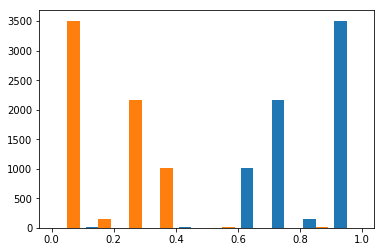

In [65]:
plt.hist(predicciones_probabilidades)

In [66]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [67]:
X = X_test.reset_index().copy()
X["max_hipoteca"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, probs_df], axis=1)
X[["max_hipoteca", "prediccion", 0, 1]].head(20)

,max_hipoteca,prediccion,0,1
0,0,0,0.998416,0.001584
1,0,0,0.968693,0.031307
2,0,0,0.741470,0.258530
3,1,0,0.928687,0.071313
4,0,0,0.676108,0.323892
5,0,0,0.761244,0.238756
6,1,0,0.720658,0.279342
7,0,0,0.977018,0.022982
8,0,0,0.971750,0.028250
9,0,0,0.741470,0.258530


In [68]:
from sklearn import metrics

In [69]:
metrics.r2_score(X["max_hipoteca"], X["prediccion"])

-0.18022447519258922

In [70]:
metrics.mean_absolute_error(X["max_hipoteca"], X["prediccion"])

0.14325229291017616

In [71]:
np.corrcoef(X["max_hipoteca"], X["prediccion"])**2

array([[1.       , 0.0019809],
       [0.0019809, 1.       ]])